# Modeling - Logistic Regression

This notebook will implement logistic regression on the combined Questionnaire, Demographic, and Exam Dataset.

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## Data Preprocessing

Importing Questionnaire, Demographic, and Exam datasets

In [4]:
## importing datasets
quest_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/quest_df_clean_filtered.csv')
quest_df

,SEQN,BP_Presence_Yes,high_col_Don't Know,high_col_No,high_col_Yes,Smoked_100_cigs_Don't Know,Smoked_100_cigs_No,Smoked_100_cigs_Yes,drink_greater_11_Don't Know,drink_greater_11_No,...,angina_Yes,heart_attack_Don't Know,heart_attack_No,heart_attack_Yes,stroke_Don't Know,stroke_No,stroke_Yes,close_relative_heart_attack_Don't Know,close_relative_heart_attack_No,close_relative_heart_attack_Yes
0,73557,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1,73558,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
2,73559,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,73561,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,73562,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5541,83723,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5542,83724,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5543,83726,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5544,83727,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [5]:
demographic_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/demographic_df_clean_filtered.csv')
demographic_df

,SEQN,sex,age,fam_income_poverty_ratio,Education_College graduate or above,Education_Don't Know,Education_High school graduate/GED or equivalent,Education_Less than 9th grade,Education_Refused,Education_Some college or AA degree,Marital_Status_Married,Marital_Status_Never married,Marital_Status_Separated,Marital_Status_Widowed,Ethnicity_Mexican American,Ethnicity_Non-Hispanic Asian,Ethnicity_Non-Hispanic Black,Ethnicity_Non-Hispanic White,Ethnicity_Other Hispanic,Ethnicity_Other Race - Including Multi-Racial
0,73557,1,69,0.84,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,73558,1,54,1.78,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,73559,1,72,4.51,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
3,73561,0,73,5.00,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,73562,1,56,4.79,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5539,83723,1,61,3.53,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5540,83724,1,80,3.09,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
5541,83726,1,40,3.81,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
5542,83727,1,26,1.39,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [6]:
exam_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/exam_df_clean_filtered.csv')
exam_df

,SEQN,puls_reg_nonreg,bpsy_r1,bpsy_r2,bpsy_r3,bpdi_r1,bpdi_r2,bpdi_r3,weight_kg,height_cm,bmi,waist_circum_cm,arm_circum_cm,leg_len_cm
0,73557,1.0,122.0,114.0,102.0,72.0,76.0,74.0,78.3,171.3,26.7,100.0,35.3,39.2
1,73558,1.0,156.0,160.0,156.0,62.0,80.0,42.0,89.5,176.8,28.6,107.6,34.7,40.0
2,73559,1.0,140.0,140.0,146.0,90.0,76.0,80.0,88.9,175.3,28.9,109.2,33.5,40.0
3,73561,1.0,136.0,134.0,142.0,86.0,88.0,86.0,52.0,162.4,19.7,87.8,25.2,36.3
4,73562,1.0,160.0,158.0,154.0,84.0,82.0,80.0,105.0,158.7,41.7,123.1,41.8,34.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5541,83723,1.0,116.0,138.0,142.0,66.0,60.0,68.0,99.5,173.5,33.1,115.0,35.8,44.0
5542,83724,1.0,164.0,168.0,168.0,70.0,66.0,66.0,77.1,176.0,24.9,92.3,31.0,38.0
5543,83726,1.0,116.0,116.0,114.0,66.0,66.0,68.0,79.0,171.7,26.8,97.7,31.0,38.5
5544,83727,1.0,110.0,116.0,112.0,68.0,74.0,76.0,71.8,171.3,24.5,87.1,29.9,41.4


In [11]:
# Merge demographic_df and quest_df on SEQN (common key) using an inner join
merged_df = pd.merge(demographic_df, quest_df, on='SEQN', how='inner')

# Merge the result with exam_df on SEQN (common key) using an inner join
merged_df = pd.merge(merged_df, exam_df[['SEQN', 'weight_kg', 'height_cm']], on='SEQN', how='inner')

# Display the first few rows to confirm the merge
merged_df

,SEQN,sex,age,fam_income_poverty_ratio,Education_College graduate or above,Education_Don't Know,Education_High school graduate/GED or equivalent,Education_Less than 9th grade,Education_Refused,Education_Some college or AA degree,...,heart_attack_No,heart_attack_Yes,stroke_Don't Know,stroke_No,stroke_Yes,close_relative_heart_attack_Don't Know,close_relative_heart_attack_No,close_relative_heart_attack_Yes,weight_kg,height_cm
0,73557,1,69,0.84,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,78.3,171.3
1,73558,1,54,1.78,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,89.5,176.8
2,73559,1,72,4.51,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,88.9,175.3
3,73561,0,73,5.00,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,52.0,162.4
4,73562,1,56,4.79,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,105.0,158.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,83723,1,61,3.53,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,99.5,173.5
5525,83724,1,80,3.09,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,77.1,176.0
5526,83726,1,40,3.81,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,79.0,171.7
5527,83727,1,26,1.39,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,71.8,171.3


In [13]:
merged_df.isna().sum()

SEQN                                      0
sex                                       0
age                                       0
fam_income_poverty_ratio                  0
Education_College graduate or above       0
                                         ..
close_relative_heart_attack_Don't Know    0
close_relative_heart_attack_No            0
close_relative_heart_attack_Yes           0
weight_kg                                 0
height_cm                                 0
Length: 78, dtype: int64

In [15]:
# List of columns to exclude from conversion
exclude_columns = ['fam_income_poverty_ratio', 'weight_kg', 'height_cm']

# Loop through all columns and convert to int64 except the excluded columns
for col in merged_df.columns:
    if col not in exclude_columns:
        # Convert column to numeric with int64, handling potential errors
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce').astype('Int64')

# Display the first few rows to confirm the changes
merged_df.dtypes

SEQN                                        Int64
sex                                         Int64
age                                         Int64
fam_income_poverty_ratio                  float64
Education_College graduate or above         Int64
                                           ...   
close_relative_heart_attack_Don't Know      Int64
close_relative_heart_attack_No              Int64
close_relative_heart_attack_Yes             Int64
weight_kg                                 float64
height_cm                                 float64
Length: 78, dtype: object

In [17]:
# saving df for reference for other models 
#quest_demo_df.to_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/final_data.csv', index=True)

In [22]:
# bining age 
# Create age bins
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
labels = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81+']
merged_df['age_bins'] = pd.cut(merged_df['age'], bins=bins, labels=labels, right = False, include_lowest=True)

# One-hot encode age_bins
merged_df = pd.get_dummies(merged_df, columns=['age_bins'], drop_first=False)

In [24]:
columns_to_change =  ['age_bins_20-25','age_bins_26-30','age_bins_31-35','age_bins_36-40','age_bins_41-45','age_bins_46-50','age_bins_51-55','age_bins_56-60','age_bins_61-65','age_bins_66-70','age_bins_71-75','age_bins_76-80','age_bins_81+']
merged_df[columns_to_change] = merged_df[columns_to_change].astype(int)

In [26]:
merged_df

,SEQN,sex,age,fam_income_poverty_ratio,Education_College graduate or above,Education_Don't Know,Education_High school graduate/GED or equivalent,Education_Less than 9th grade,Education_Refused,Education_Some college or AA degree,...,age_bins_36-40,age_bins_41-45,age_bins_46-50,age_bins_51-55,age_bins_56-60,age_bins_61-65,age_bins_66-70,age_bins_71-75,age_bins_76-80,age_bins_81+
0,73557,1,69,0.84,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,73558,1,54,1.78,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,73559,1,72,4.51,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,73561,0,73,5.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,73562,1,56,4.79,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,83723,1,61,3.53,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5525,83724,1,80,3.09,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5526,83726,1,40,3.81,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5527,83727,1,26,1.39,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# saving df for reference 
merged_df.to_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/final_data.csv', index=True)

## Logistic Regression

1. Start by filtering out individuals who already have cardiovascular disease

('congestive_heart_failure_Yes', 
    'coronary_heart_disease_Yes', 
    'heart_attack_Yes', 
    'stroke_Yes')

2. Defining target variable, symptoms

In [31]:
merged_df.columns

Index(['SEQN', 'sex', 'age', 'fam_income_poverty_ratio',
       'Education_College graduate or above', 'Education_Don't Know',
       'Education_High school graduate/GED or equivalent',
       'Education_Less than 9th grade', 'Education_Refused',
       'Education_Some college or AA degree', 'Marital_Status_Married',
       'Marital_Status_Never married', 'Marital_Status_Separated',
       'Marital_Status_Widowed', 'Ethnicity_Mexican American',
       'Ethnicity_Non-Hispanic Asian', 'Ethnicity_Non-Hispanic Black',
       'Ethnicity_Non-Hispanic White', 'Ethnicity_Other Hispanic',
       'Ethnicity_Other Race - Including Multi-Racial', 'BP_Presence_Yes',
       'high_col_Don't Know', 'high_col_No', 'high_col_Yes',
       'Smoked_100_cigs_Don't Know', 'Smoked_100_cigs_No',
       'Smoked_100_cigs_Yes', 'drink_greater_11_Don't Know',
       'drink_greater_11_No', 'drink_greater_11_Yes',
       'Vigorous_work_activity_No', 'Vigorous_work_activity_Refused',
       'Vigorous_work_activity_Ye

### Setting up X and Y

In [75]:
# Filter out at risk variables

# Step 1: Define the cardiovascular disease conditions
cvd_conditions = [
    'congestive_heart_failure_Yes', 
    'coronary_heart_disease_Yes', 
    'heart_attack_Yes', 
    'stroke_Yes'
]

merged_df['have_cvd'] = merged_df[cvd_conditions].max(axis=1)

# Step 2: Data Preparation
# Define the variables of interest
demographic_features = ['sex', 'Education_College graduate or above',
       'Education_High school graduate/GED or equivalent',
       'Education_Less than 9th grade', 
       'Education_Some college or AA degree', 'Ethnicity_Mexican American',
       'Ethnicity_Non-Hispanic Asian', 'Ethnicity_Non-Hispanic Black',
       'Ethnicity_Non-Hispanic White', 'Ethnicity_Other Hispanic',
       'Ethnicity_Other Race - Including Multi-Racial','weight_kg', 'height_cm',
        'age_bins_20-25', 'age_bins_26-30',
       'age_bins_31-35', 'age_bins_36-40', 'age_bins_41-45', 'age_bins_46-50',
       'age_bins_51-55', 'age_bins_56-60', 'age_bins_61-65', 'age_bins_66-70',
       'age_bins_71-75', 'age_bins_76-80', 'age_bins_81+']

# Create additional features based on CVD indicators
merged_df['has_angina'] = merged_df['angina_Yes'].astype(int)
merged_df['has_family_history'] = merged_df['close_relative_heart_attack_Yes'].astype(int)

In [77]:
merged_df.isna().sum()

SEQN                                   0
sex                                    0
age                                    0
fam_income_poverty_ratio               0
Education_College graduate or above    0
                                      ..
age_bins_76-80                         0
age_bins_81+                           0
have_cvd                               0
has_angina                             0
has_family_history                     0
Length: 94, dtype: int64

In [79]:
# 'have_cvd' is target variable (1 for CVD, 0 for no CVD)
X = merged_df[demographic_features + ['has_angina', 'has_family_history']]
y = merged_df['have_cvd']  # Make sure both 0 and 1 are present

In [81]:
# Check original class distribution
print("Original class distribution:")
print(y.value_counts())

Original class distribution:
have_cvd
0    4988
1     541
Name: count, dtype: Int64


In [83]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler


#Stratified Train-Test Split 

ros = RandomOverSampler(random_state=42)

# Apply Random Oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the new class distribution
print("New class distribution after Random Oversampling:")
print(y_resampled.value_counts())

# Perform the stratified train-test split on the resampled dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, 
    test_size=0.2, stratify=y_resampled, random_state=42
)

# Check final shapes
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

New class distribution after Random Oversampling:
have_cvd
1    4988
0    4988
Name: count, dtype: Int64
Training set shape: (7980, 28), Test set shape: (1996, 28)


<Figure size 1000x600 with 0 Axes>

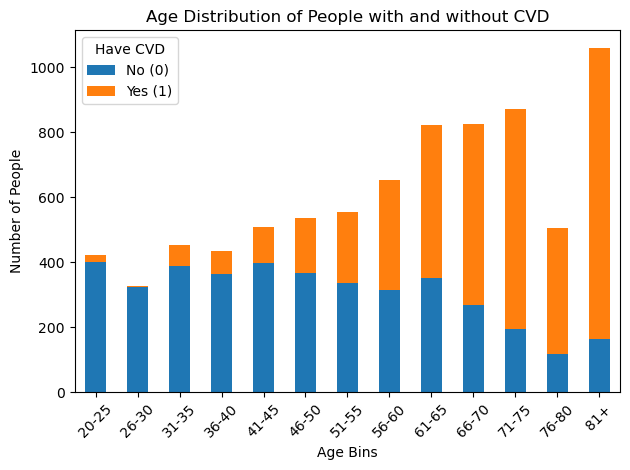

In [87]:
def assign_age_bin(row):

  
    if row['age_bins_20-25'] == 1:
        return '20-25'
    elif row['age_bins_26-30'] == 1:
        return '26-30'
    elif row['age_bins_31-35'] == 1:
        return '31-35'    
    elif row['age_bins_36-40'] == 1:
        return '36-40'
    elif row['age_bins_41-45'] == 1:
        return '41-45'
    elif row['age_bins_46-50'] == 1:
        return '46-50'
    elif row['age_bins_51-55'] == 1:
        return '51-55'
    elif row['age_bins_56-60'] == 1:
        return '56-60'
    elif row['age_bins_61-65'] == 1:
        return '61-65'
    elif row['age_bins_66-70'] == 1:
        return '66-70'
    elif row['age_bins_71-75'] == 1:
        return '71-75'
    elif row['age_bins_76-80'] == 1:
        return '76-80'
    elif row['age_bins_81+'] == 1:
        return '81+'
    return 'Unknown'

# Apply the function to create 'age_bin' column
X_train['age_bin'] = X_train.apply(assign_age_bin, axis=1)

# Step 2: Combine the new 'age_bin' column with the target column 'have_cvd'
data = pd.concat([X_train[['age_bin']], y_train], axis=1)

# Step 3: Group by the new 'age_bin' and 'have_cvd' class, then count occurrences
age_cvd_counts = data.groupby(['age_bin', 'have_cvd']).size().unstack()

# Step 4: Plot the counts for each age bin with CVD and without CVD
plt.figure(figsize=(10, 6))
age_cvd_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Set titles and labels
plt.title('Age Distribution of People with and without CVD')
plt.xlabel('Age Bins')
plt.ylabel('Number of People')
plt.legend(title='Have CVD', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [89]:
print("y_train distribution:\n", y_train.value_counts())

y_train distribution:
 have_cvd
0    3990
1    3990
Name: count, dtype: Int64


### Test-Train Split

In [63]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
X.shape

(5546, 19)

In [67]:
y.shape

(5546,)

In [69]:
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())

y_train distribution:
 have_cvd
0    3505
1     377
Name: count, dtype: int64
y_test distribution:
 have_cvd
0    1500
1     164
Name: count, dtype: int64


### Over and Undersampling for Class Imbalance Using SMOTEENN

In [100]:
from imblearn.combine import SMOTEENN

In [102]:
X_train.columns

Index(['sex', 'Education_College graduate or above',
       'Education_High school graduate/GED or equivalent',
       'Education_Less than 9th grade', 'Education_Some college or AA degree',
       'Ethnicity_Mexican American', 'Ethnicity_Non-Hispanic Asian',
       'Ethnicity_Non-Hispanic Black', 'Ethnicity_Non-Hispanic White',
       'Ethnicity_Other Hispanic',
       'Ethnicity_Other Race - Including Multi-Racial', 'weight_kg',
       'height_cm', 'age_bins_20-25', 'age_bins_26-30', 'age_bins_31-35',
       'age_bins_36-40', 'age_bins_41-45', 'age_bins_46-50', 'age_bins_51-55',
       'age_bins_56-60', 'age_bins_61-65', 'age_bins_66-70', 'age_bins_71-75',
       'age_bins_76-80', 'age_bins_81+', 'has_angina', 'has_family_history'],
      dtype='object')

In [107]:
#X_train = X_train.drop(columns='age_bin')

In [109]:
smote_enn = SMOTEENN(random_state=42)
X_train_resampled_smote_enn, y_train_resampled_smote_enn = smote_enn.fit_resample(X_train, y_train)

In [127]:
print("y_train distribution:\n", y_train_resampled_smote_enn.value_counts())
print("y_test distribution:\n", y_test.value_counts())

y_train distribution:
 have_cvd
1    3913
0    2926
Name: count, dtype: Int64
y_test distribution:
 have_cvd
1    998
0    998
Name: count, dtype: Int64


### Scaling

In [129]:
ss = StandardScaler()
ss.fit(X_train_resampled_smote_enn)

X_train_ss = ss.transform(X_train_resampled_smote_enn)
X_test_ss = ss.transform(X_test)

In [135]:
from sklearn.linear_model import LogisticRegression
cvd_lr = LogisticRegression(class_weight='balanced',random_state=42)
cvd_lr.fit(X_train_ss,  y_train_resampled_smote_enn)

LogisticRegression(class_weight='balanced', random_state=42)

In [137]:
y_pred = cvd_lr.predict(X_test)

In [139]:
# Predict probabilities
y_prob = cvd_lr.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

In [141]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       998
         1.0       0.00      0.00      0.00       998

    accuracy                           0.50      1996
   macro avg       0.25      0.50      0.33      1996
weighted avg       0.25      0.50      0.33      1996



In [145]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
}

# Instantiate the GridSearchCV
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), 
                           param_grid, 
                           scoring='f1', 
                           cv=5)

# Fit the model
grid_search.fit(X_train_ss, y_train_resampled_smote_enn)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best parameters found:  {'C': 0.01, 'penalty': 'l2'}
Accuracy: 0.501002004008016
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       998
         1.0       1.00      0.00      0.00       998

    accuracy                           0.50      1996
   macro avg       0.75      0.50      0.34      1996
weighted avg       0.75      0.50      0.34      1996



### Creating Threshold

In [158]:
new_threshold = 0.7 # Example threshold

# Step 3: Make predictions based on the new threshold
y_pred_adjusted = np.where(y_prob >= new_threshold, 1, 0)

# Step 4: Evaluate the model with the adjusted threshold
print('Adjusted Threshold:', new_threshold)
print('Accuracy:', accuracy_score(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

Adjusted Threshold: 0.7
Accuracy: 0.5
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       998
         1.0       0.00      0.00      0.00       998

    accuracy                           0.50      1996
   macro avg       0.25      0.50      0.33      1996
weighted avg       0.25      0.50      0.33      1996



### Visualizing Precision-Recall Trade-off:

In [160]:
from sklearn.metrics import precision_recall_curve

In [162]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

In [166]:
# Plot Precision-Recall curve
from sklearn.metrics import roc_curve

# Step 1: Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Step 2: Find the best threshold (you can define your own criteria)
optimal_idx = np.argmax(tpr - fpr)  # Example: maximize true positive rate while minimizing false positive rate
optimal_threshold = thresholds[optimal_idx]

# Step 3: Make predictions based on the optimal threshold
y_pred_optimal = np.where(y_prob >= optimal_threshold, 1, 0)

# Step 4: Evaluate
print('Optimal Threshold:', optimal_threshold)
print('Accuracy:', accuracy_score(y_test, y_pred_optimal))
print(classification_report(y_test, y_pred_optimal))

Optimal Threshold: 5.212798932325138e-12
Accuracy: 0.5826653306613226
              precision    recall  f1-score   support

         0.0       0.65      0.35      0.46       998
         1.0       0.56      0.81      0.66       998

    accuracy                           0.58      1996
   macro avg       0.61      0.58      0.56      1996
weighted avg       0.61      0.58      0.56      1996



Prioritizing Recall to detect as many true positives as possible. 

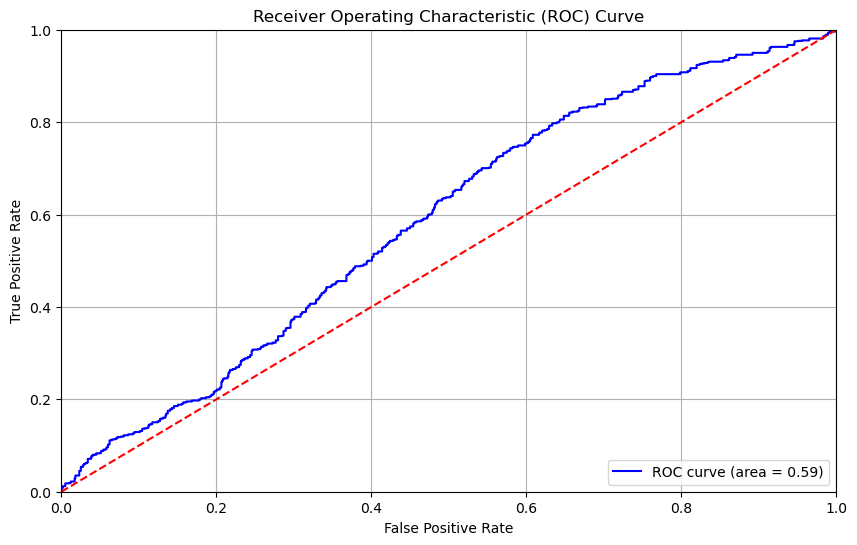

In [170]:
from sklearn.metrics import roc_curve, auc

# Step 1: Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Step 2: Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Step 3: Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

This model's TPR (sensitivity) is low for the corresponding FPR. It does not do well with correctly indentifying positive instances without also increasing false positives. 

### Interpretting Coefficients 

In [180]:
# extracting column names
feature_names = X_train.columns
feature_names

Index(['sex', 'Education_College graduate or above',
       'Education_High school graduate/GED or equivalent',
       'Education_Less than 9th grade', 'Education_Some college or AA degree',
       'Ethnicity_Mexican American', 'Ethnicity_Non-Hispanic Asian',
       'Ethnicity_Non-Hispanic Black', 'Ethnicity_Non-Hispanic White',
       'Ethnicity_Other Hispanic',
       'Ethnicity_Other Race - Including Multi-Racial', 'weight_kg',
       'height_cm', 'age_bins_20-25', 'age_bins_26-30', 'age_bins_31-35',
       'age_bins_36-40', 'age_bins_41-45', 'age_bins_46-50', 'age_bins_51-55',
       'age_bins_56-60', 'age_bins_61-65', 'age_bins_66-70', 'age_bins_71-75',
       'age_bins_76-80', 'age_bins_81+', 'has_angina', 'has_family_history'],
      dtype='object')

In [182]:
#getting coefficients of features 
coefficients = cvd_lr.coef_[0]
coefficients

array([ 0.28345195, -0.38459012, -0.03850138, -0.10593864, -0.21418962,
       -0.10067656, -0.1916608 ,  0.14574692,  0.07523406, -0.11156643,
        0.09499867,  0.20551263, -0.24427233, -0.60204243, -0.7481608 ,
       -0.39777335, -0.39139291, -0.33749899, -0.19351892, -0.08985646,
        0.04411745,  0.03926948,  0.23182701,  0.47719216,  0.37415836,
        0.74624793,  1.00806917,  0.28990291])

In [184]:
# Place feature names in a dataframe
feat_df = pd.DataFrame({'Feature': feature_names})
feat_df

,Feature
0,sex
1,Education_College graduate or above
2,Education_High school graduate/GED or equivalent
3,Education_Less than 9th grade
4,Education_Some college or AA degree
5,Ethnicity_Mexican American
6,Ethnicity_Non-Hispanic Asian
7,Ethnicity_Non-Hispanic Black
8,Ethnicity_Non-Hispanic White
9,Ethnicity_Other Hispanic


In [186]:
#placing coefficients in dataset
coef_df = pd.DataFrame({"Coefficients": coefficients})
coef_df

,Coefficients
0,0.283452
1,-0.384590
2,-0.038501
3,-0.105939
4,-0.214190
5,-0.100677
6,-0.191661
7,0.145747
8,0.075234
9,-0.111566


In [188]:
#merging feature names and coefficients in one dataframe
feat_coef = pd.concat([feat_df,coef_df], axis=1)
feat_coef

,Feature,Coefficients
0,sex,0.283452
1,Education_College graduate or above,-0.384590
2,Education_High school graduate/GED or equivalent,-0.038501
3,Education_Less than 9th grade,-0.105939
4,Education_Some college or AA degree,-0.214190
5,Ethnicity_Mexican American,-0.100677
6,Ethnicity_Non-Hispanic Asian,-0.191661
7,Ethnicity_Non-Hispanic Black,0.145747
8,Ethnicity_Non-Hispanic White,0.075234
9,Ethnicity_Other Hispanic,-0.111566


In [190]:
feat_coef.columns = ['Feature', 'Coefficient']

# Sort the coefficients from greatest to least
feat_coef_sorted = feat_coef.sort_values(by='Coefficient', ascending=False)

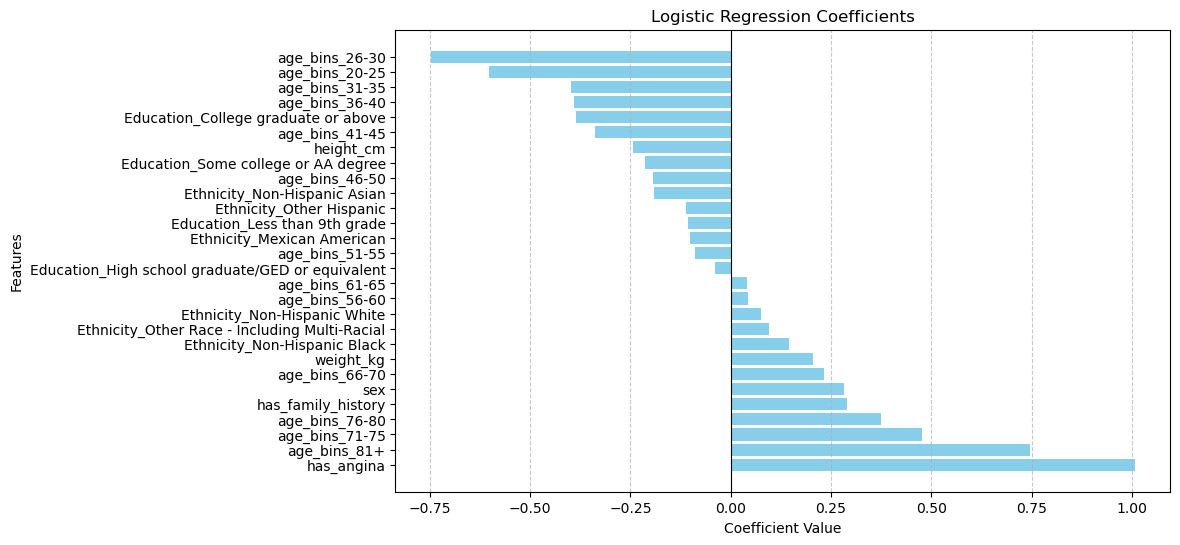

In [192]:
plt.figure(figsize=(10, 6))
plt.barh(feat_coef_sorted['Feature'], feat_coef_sorted['Coefficient'], color='skyblue')
plt.axvline(0, color='black', lw=0.8)  # Line at zero for reference
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Tuning Logistic Regression Model

In [197]:
# Define the logistic regression model with L1 regularization (lasso)
cvd_lr2 = LogisticRegression(penalty='l1', solver='saga', random_state=42, max_iter=1000)

# Set up the parameter grid to tune the C value (regularization strength)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(cvd_lr2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_resampled_smote_enn, y_train_resampled_smote_enn)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          random_state=42, solver='saga'),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [198]:
# Get the best model from the grid search
cvd_lr2 = grid_search.best_estimator_
cvd_lr2

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=42,
                   solver='saga')

### Interpretting Coefficients

In [217]:
coefficients = cvd_lr2.coef_[0]
coefficients

array([ 0.29786932, -0.60485419,  0.09040112,  0.        , -0.23878335,
       -0.10659827, -0.33533215,  0.43305032,  0.32193821, -0.06876097,
        0.044995  ,  0.00770013, -0.00798625, -1.42179029, -1.34507212,
       -1.08276582, -0.98904259, -0.7859346 , -0.33714335, -0.0069119 ,
        0.29913112,  0.36268562,  0.93024471,  1.52100065,  1.27642909,
        2.05941975,  1.87690162,  0.7027269 ])

In [219]:
# Place feature names in a dataframe
feat_df = pd.DataFrame({'Feature': feature_names})
feat_df

,Feature
0,sex
1,Education_College graduate or above
2,Education_High school graduate/GED or equivalent
3,Education_Less than 9th grade
4,Education_Some college or AA degree
5,Ethnicity_Mexican American
6,Ethnicity_Non-Hispanic Asian
7,Ethnicity_Non-Hispanic Black
8,Ethnicity_Non-Hispanic White
9,Ethnicity_Other Hispanic


In [221]:
#placing coefficients in dataset
coef_df = pd.DataFrame({"Coefficients": coefficients})
coef_df

,Coefficients
0,0.297869
1,-0.604854
2,0.090401
3,0.000000
4,-0.238783
5,-0.106598
6,-0.335332
7,0.433050
8,0.321938
9,-0.068761


In [223]:
#merging feature names and coefficients in one dataframe
feat_coef = pd.concat([feat_df,coef_df], axis=1)
feat_coef

,Feature,Coefficients
0,sex,0.297869
1,Education_College graduate or above,-0.604854
2,Education_High school graduate/GED or equivalent,0.090401
3,Education_Less than 9th grade,0.000000
4,Education_Some college or AA degree,-0.238783
5,Ethnicity_Mexican American,-0.106598
6,Ethnicity_Non-Hispanic Asian,-0.335332
7,Ethnicity_Non-Hispanic Black,0.433050
8,Ethnicity_Non-Hispanic White,0.321938
9,Ethnicity_Other Hispanic,-0.068761


Higher education level is associated with a decrease in log-odds of having cardiovascular disease. With each kilogram increase in weight, the log-odds of having cardiovascular disease increases slightly. Younger age groups are associated with lower odds of having cardiovascular disease. Those who have angina or family history are much more likely to have cardiovascular disease. 

In [225]:
feat_coef.columns = ['Feature', 'Coefficient']

# Sort the coefficients from greatest to least
feat_coef_sorted = feat_coef.sort_values(by='Coefficient', ascending=False)

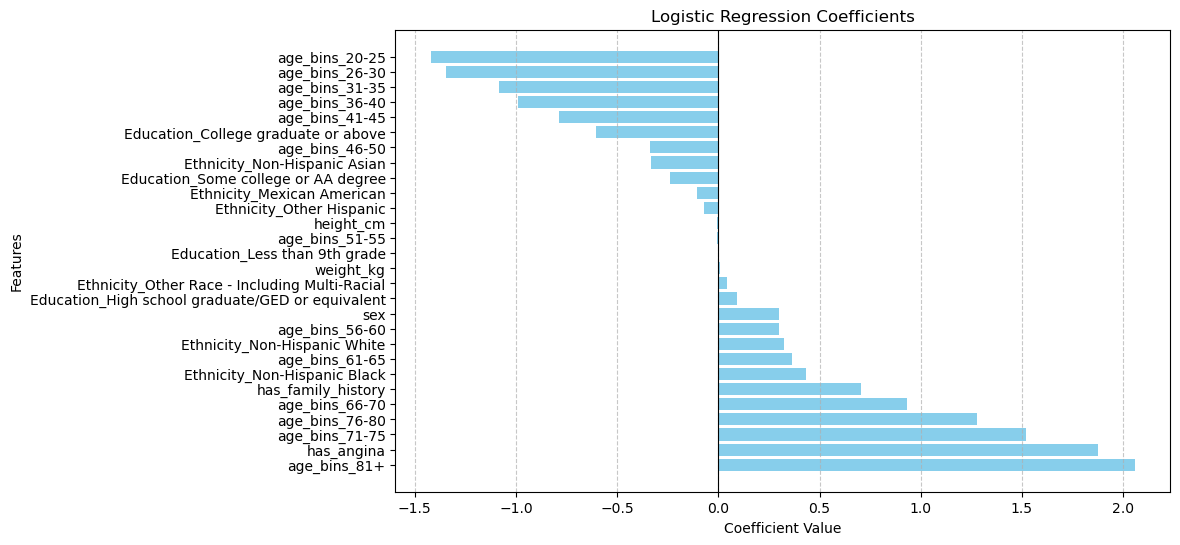

In [227]:
plt.figure(figsize=(10, 6))
plt.barh(feat_coef_sorted['Feature'], feat_coef_sorted['Coefficient'], color='skyblue')
plt.axvline(0, color='black', lw=0.8)  # Line at zero for reference
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Model Evaluation

In [202]:
# Evaluate on train set
train_acc = cvd_lr2.score(X_train_resampled_smote_enn, y_train_resampled_smote_enn)
print(f"Train accuracy with Lasso: {train_acc:.4f}")

Train accuracy with Lasso: 0.8027


In [204]:
# Evaluate on the test set
X_test_ss = ss.transform(X_test)  # scaling test data
test_acc = cvd_lr2.score(X_test_ss, y_test) 
print(f"Test accuracy with Lasso: {test_acc:.4f}")

Test accuracy with Lasso: 0.7700


In [206]:
y_pred = cvd_lr2.predict(X_test_ss)
y_prob = cvd_lr2.predict_proba(X_test_ss)[:, 1]  # Get probabilities for the positive class

# Step 2: Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.75      0.77       998
         1.0       0.76      0.79      0.77       998

    accuracy                           0.77      1996
   macro avg       0.77      0.77      0.77      1996
weighted avg       0.77      0.77      0.77      1996



There is a higher amount of recall for those who belong in the first class. The model slightly overfits, and has an accuracy of 77%